# Linear Regression to Quadratic Model Function

Suppose we apply linear regression to a model in the form
$$f(x) = w_0 + w_1 x + w_2 x^2$$
The function is not linear in $x$. However, the "linear" in "linear regression" refers to  linearity in parameters $w_i$. In that sense, linear regression can be applied. We just treat $x$ and $x^2$ as independent features.

In [41]:
%matplotlib notebook
import matplotlib.pylab as plt
plt.style.use("ggplot")
import numpy as np

Generate synthetic data: 20 random $x$ values, and a quadratic function plus gaussian noise for $y$.

In [49]:
x = np.random.uniform(-1,2,20)

In [57]:
y = x**2 - 2*x + 1 + np.random.normal(0,0.2,20)

Plot the resulting data points.

<IPython.core.display.Javascript object>


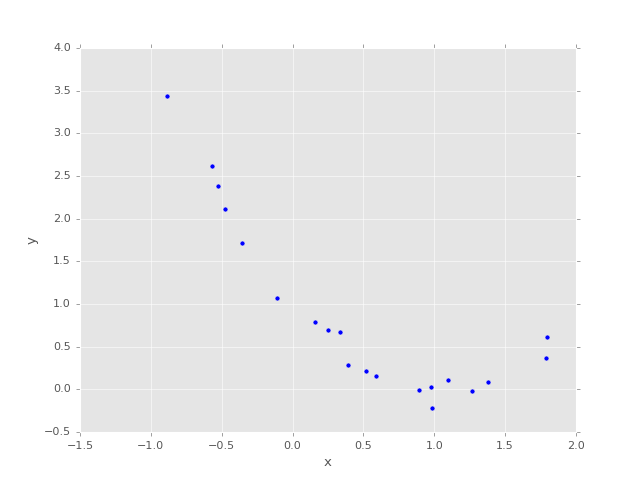

In [63]:
plt.scatter(x,y)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y");

The original, nonlinear data has one feature, $x_1 = x$. We introduce a new feature  $x_2 = x^2$.

Visualize the $(x, x^2, y)$ data points with a 3D scatter plot.

<IPython.core.display.Javascript object>


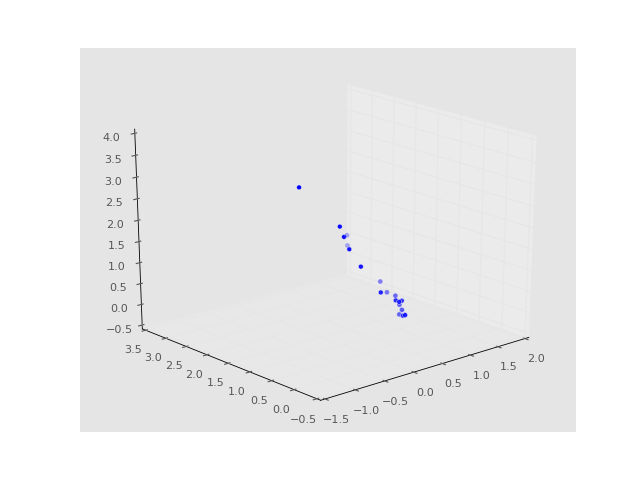

In [64]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x,x**2,y)

By rotating the axes we find a viewpoint at which the points are on a line. Linear regression will give this hyperplane.

Apply linear regression:

In [65]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
X = np.vstack((x,x**2)).transpose()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Check how well the fit results agree with the parameters $w_0 = 1$, $w_1 = -2$, $w_2=1$.

In [69]:
reg.intercept_, reg.coef_[0], reg.coef_[1]

(1.0177907751156114, -1.9683304047002679, 0.93228714178636263)

Now plot the data points together with the hyperplane resulting from the fit.

Rotate the figure to look at the plane from the side.

<IPython.core.display.Javascript object>


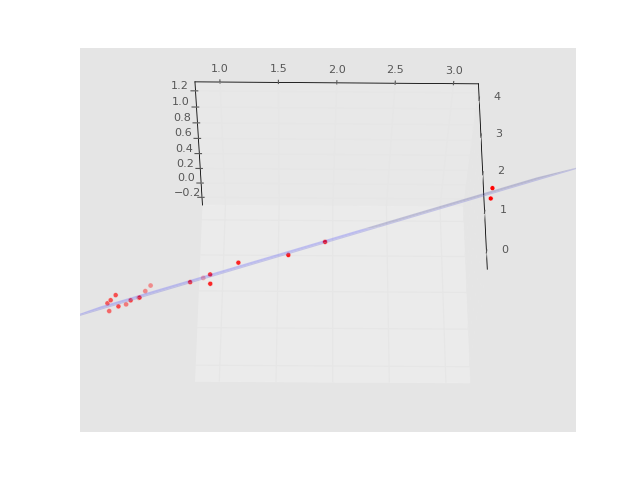

In [83]:
fig = plt.figure()
ax = fig.gca(projection='3d')
Xf = np.arange(-1.1, 2.2, 0.25)
Yf = np.arange(-0.2, 4.25, 0.25)
Xf, Yf = np.meshgrid(Xf, Yf)
Zf = reg.intercept_ + reg.coef_[0]*Xf + reg.coef_[1]*Yf
surf = ax.plot_surface(Xf, Yf, Zf, alpha=0.2)
ax.scatter(x,x**2,y,c="r")

A better visualization: Plot data points with stems coming out from the fit surface.

In [70]:
yf = reg.predict(X)

<IPython.core.display.Javascript object>


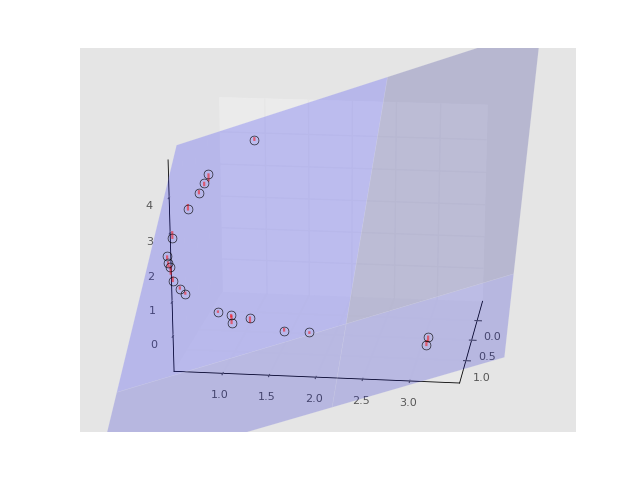

In [82]:
fig = plt.figure()
 
ax = fig.gca(projection='3d')

Xf = np.arange(-1.1, 2.2, 0.25)
Yf = np.arange(-0.2, 4.25, 0.25)
Xf, Yf = np.meshgrid(Xf, Yf)
Zf = reg.intercept_ + reg.coef_[0]*Xf + reg.coef_[1]*Yf
surf = ax.plot_surface(Xf, Yf, Zf, alpha=0.2)

for i in range(len(X)):
    ax.plot([X[i,0], X[i,0]], [X[i,1],X[i,1]], [yf[i], y[i]], linewidth=2, color='r', alpha=.5)
ax.plot(X[:,0], X[:,1], y, 'o', markersize=8, 
        markerfacecolor='none', color='r')

Now let's plot the 1D model function and the data points.

<IPython.core.display.Javascript object>


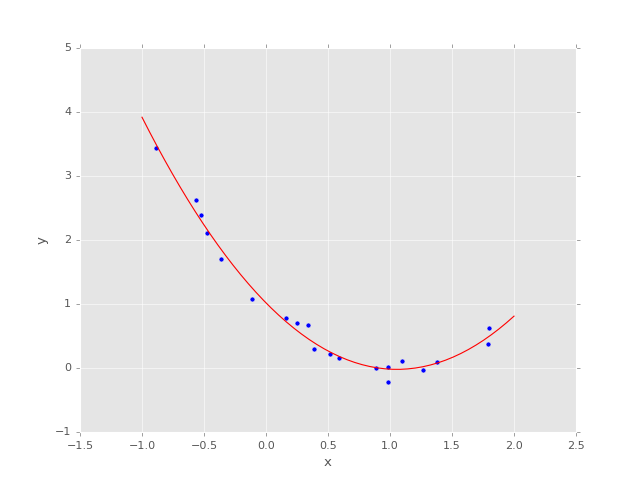

In [81]:
plt.figure()
xx = np.linspace(-1,2)
ytrue = xx**2 - 2*xx + 1
yy = reg.coef_[1]*xx**2 + reg.coef_[0]*xx + reg.intercept_
plt.plot(xx, yy, "r")
#plt.plot(xx,ytrue, "g--")
plt.scatter(x,y)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y");